# Value-Suppressing Uncertainty Palettes (VSUPs)

## Introduction

This notebook demonstrates the use of Value-Suppressing Uncertainty Palettes (VSUPs) for visualizing data with uncertainty.
VSUPs provide three different modes for mapping values and uncertainties to colors:

- USL (Uncertainty mapped to Saturation and Lightness): Affects both saturation and lightness
- US (Uncertainty mapped to Saturation): Affects saturation only
- UL (Uncertainty mapped to Lightness): Affects lightness only

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from vsup import VSUP

In [2]:
# Create a grid of values and uncertainties for better visualization
n_points = 50
values = np.linspace(1, 6, n_points)
uncertainties = np.linspace(0.1, 2, n_points)

# Create a 2D grid
values, uncertainties = np.meshgrid(values, uncertainties)

# Create VSUP instances for each mode
vsup_usl = VSUP(
    palette="viridis", mode="usl"
)  # Uncertainty mapped to saturation and lightness
vsup_us = VSUP(palette="viridis", mode="us")  # Uncertainty mapped to saturation
vsup_ul = VSUP(palette="viridis", mode="ul")  # Uncertainty mapped to lightness

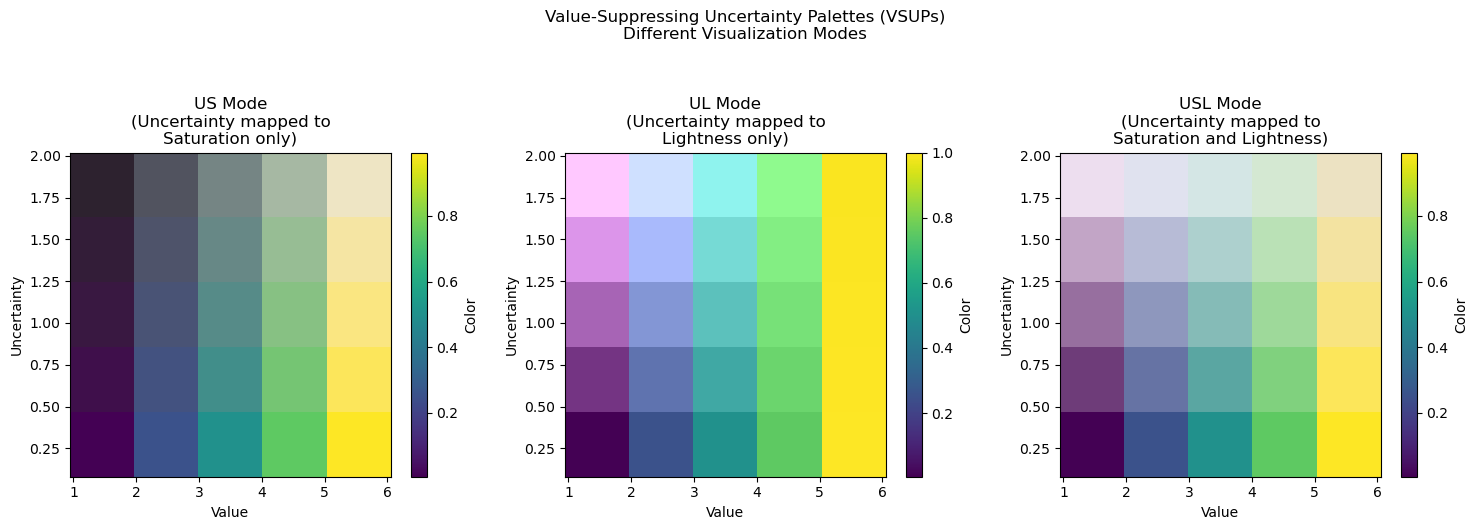

In [3]:
def create_mode_plot(ax, values, uncertainties, vsup, title, description):
    colors = vsup(values, uncertainties)
    scatter = ax.pcolormesh(values, uncertainties, colors)
    ax.set_title(f"{title}\n({description})")
    ax.set_xlabel("Value")
    ax.set_ylabel("Uncertainty")
    return scatter


# Create a figure with three subplots for different modes
fig_mode_comparison, (ax_mode_us, ax_mode_ul, ax_mode_usl) = plt.subplots(
    1, 3, figsize=(15, 5)
)

# Plot each mode
scatter_mode_usl = create_mode_plot(
    ax_mode_usl,
    values,
    uncertainties,
    vsup_usl,
    "USL Mode",
    "Uncertainty mapped to\nSaturation and Lightness",
)
scatter_mode_us = create_mode_plot(
    ax_mode_us,
    values,
    uncertainties,
    vsup_us,
    "US Mode",
    "Uncertainty mapped to\nSaturation only",
)
scatter_mode_ul = create_mode_plot(
    ax_mode_ul,
    values,
    uncertainties,
    vsup_ul,
    "UL Mode",
    "Uncertainty mapped to\nLightness only",
)

# Add colorbars
plt.colorbar(scatter_mode_usl, ax=ax_mode_usl, label="Color")
plt.colorbar(scatter_mode_us, ax=ax_mode_us, label="Color")
plt.colorbar(scatter_mode_ul, ax=ax_mode_ul, label="Color")

# Add a title to the figure
fig_mode_comparison.suptitle(
    "Value-Suppressing Uncertainty Palettes (VSUPs)\nDifferent Visualization Modes",
    y=1.05,
)
plt.tight_layout()

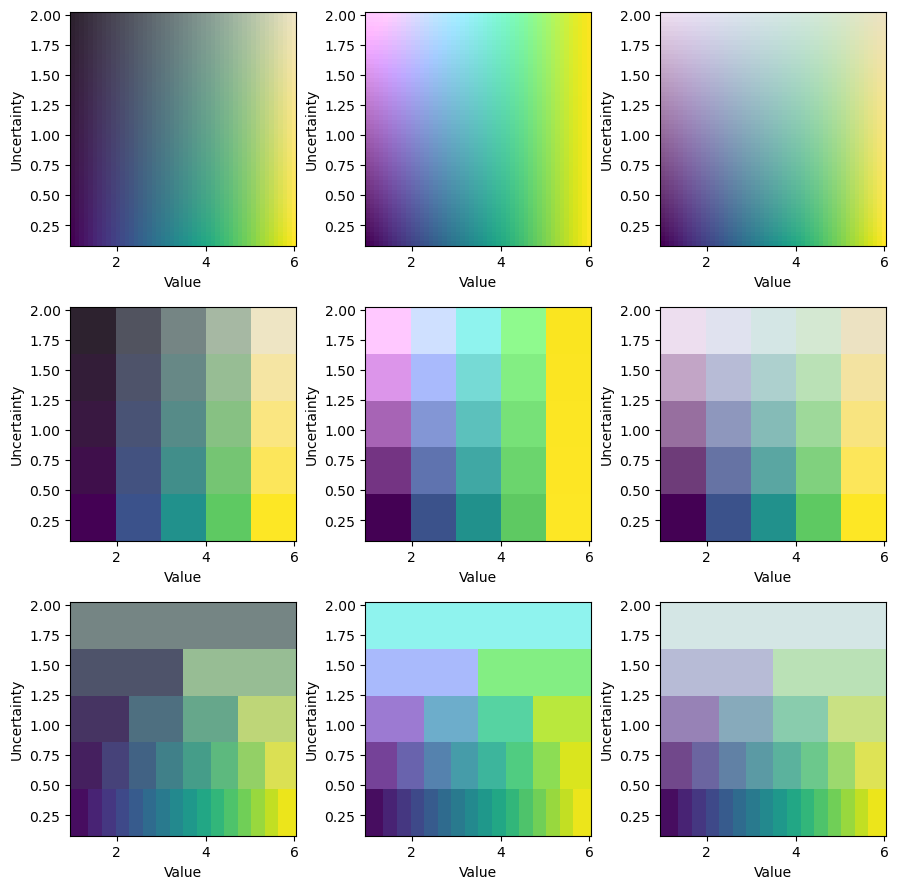

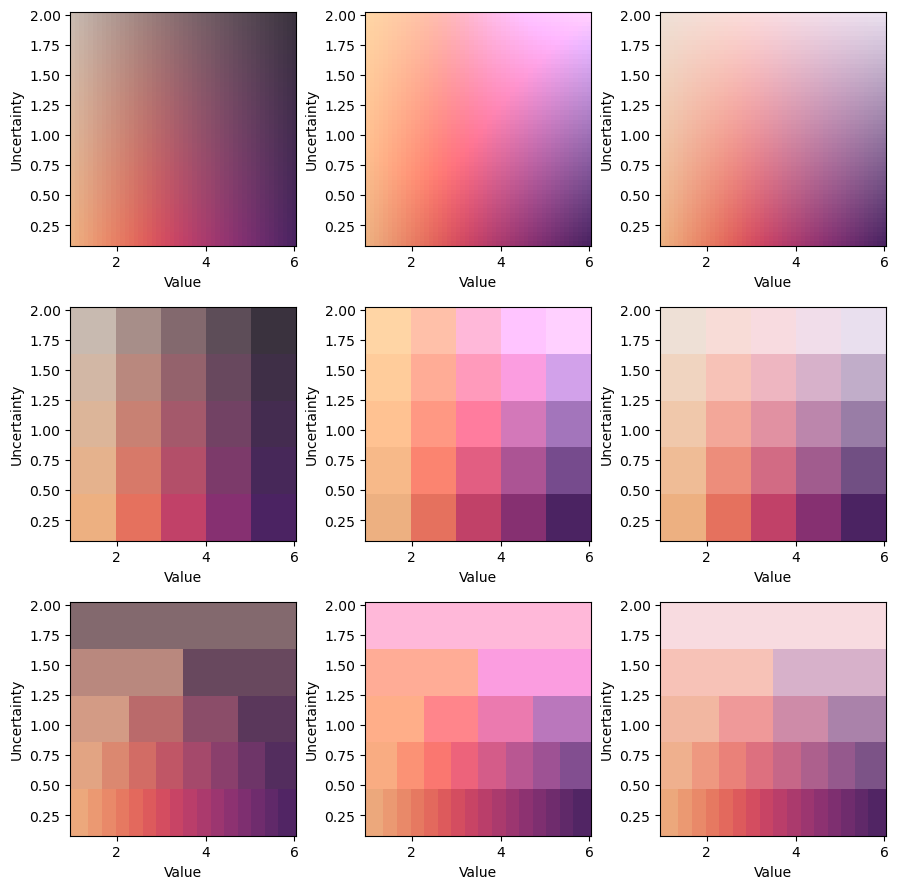

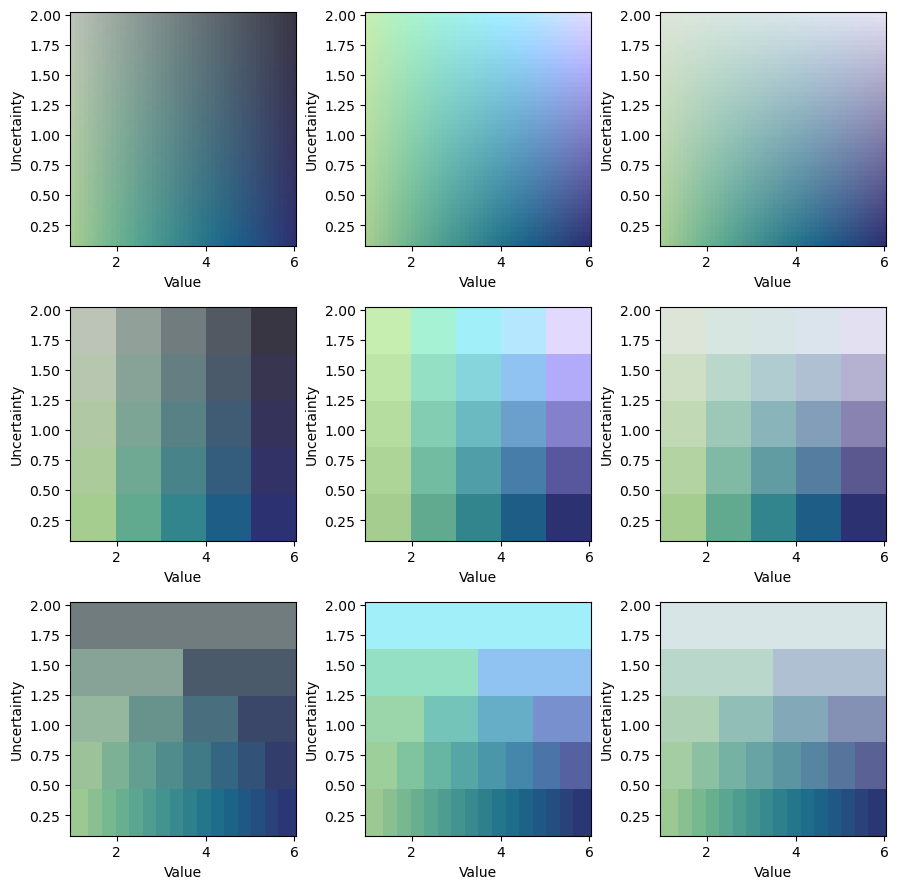

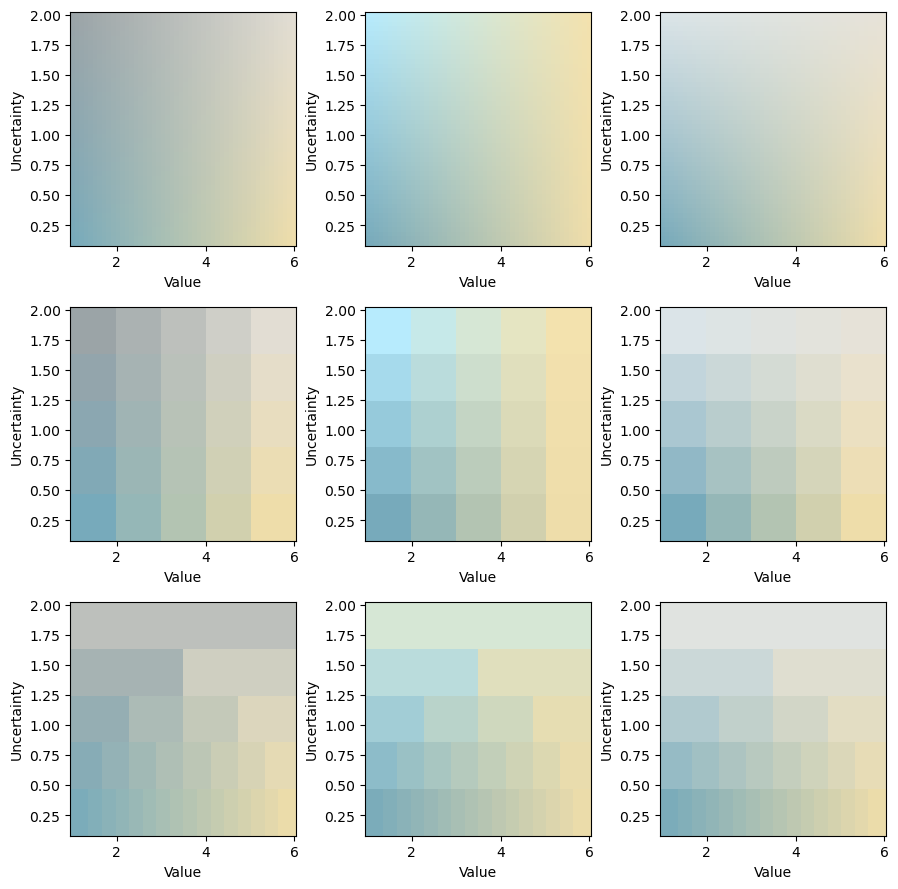

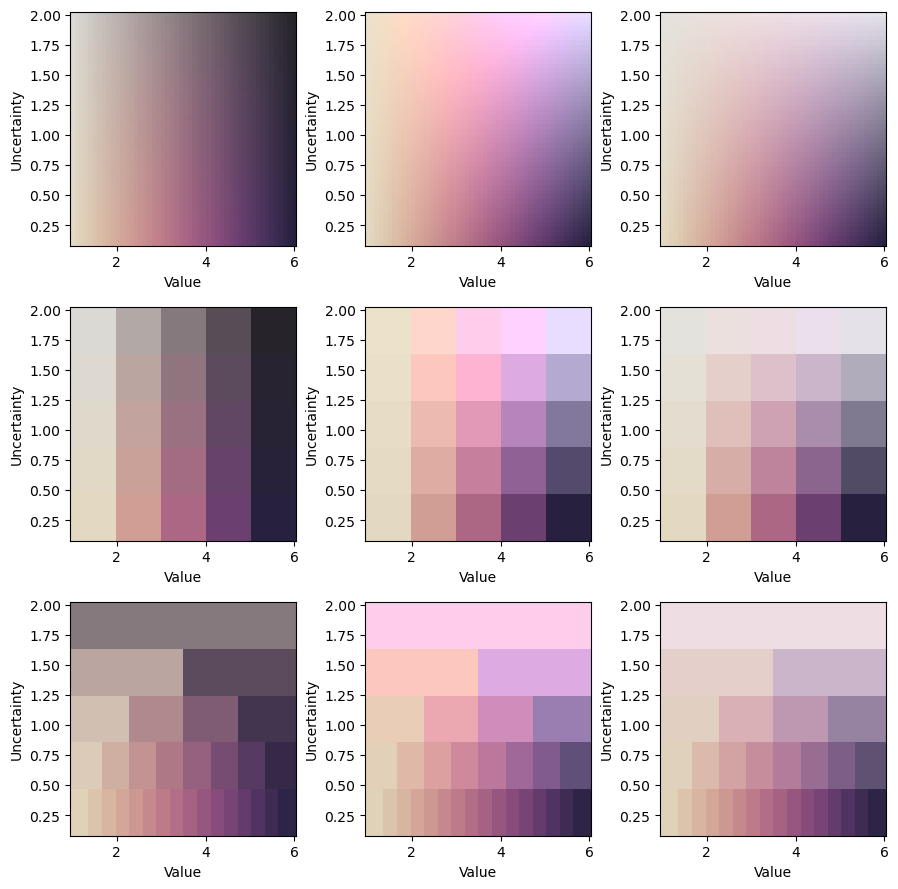

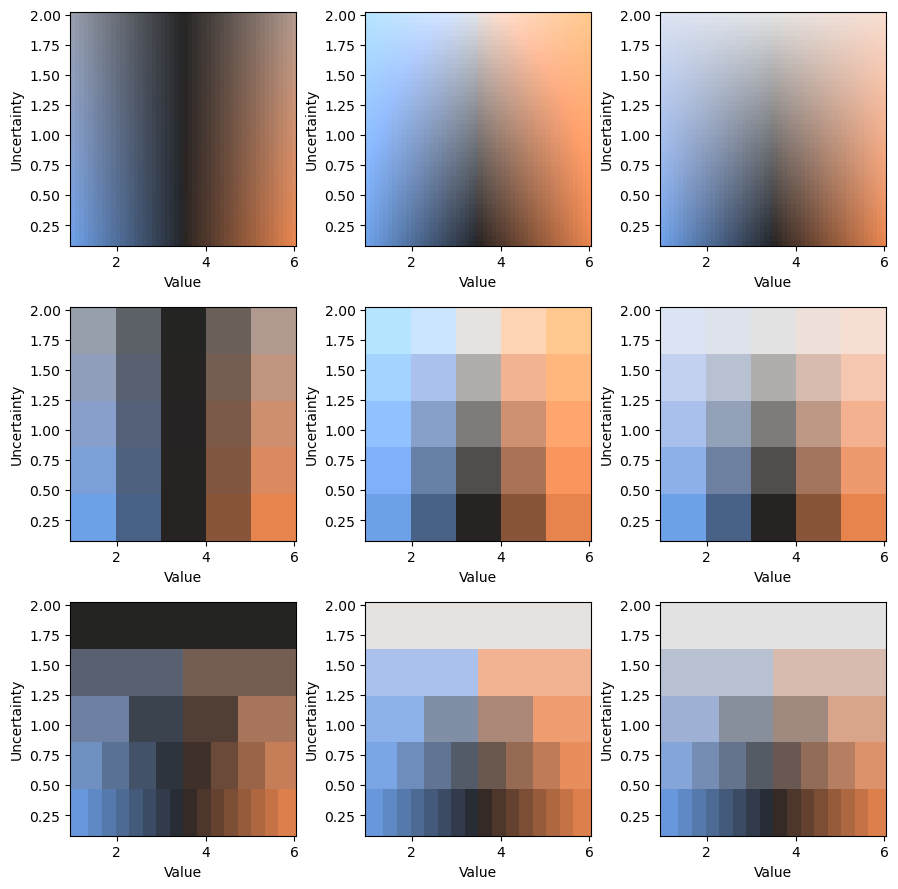

In [4]:
import seaborn as sns

diverging = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

for palette in [
    "viridis",
    "flare",
    "crest",
    "blend:#7AB,#EDA",
    "ch:s=-.2,r=.6",
    diverging,
]:
    axs = plt.subplots(3, 3, figsize=(9, 9))[1]

    for row, quantization in zip(axs, [None, "linear", "tree"]):
        for ax, mode in zip(row, ["us", "ul", "usl"]):
            vsup = VSUP(palette=palette, mode=mode, quantization=quantization)

            colors = vsup(values, uncertainties)
            ax.pcolormesh(values, uncertainties, colors)
            # ax.set_title(f"{mode}")  #\n({description})")
            ax.set_xlabel("Value")
            ax.set_ylabel("Uncertainty")

    plt.tight_layout()

## Legend Types

VSUP provides three different types of legends to help understand the color mapping:

1. Simple Legend: Shows value colors with uncertainty levels
2. Heatmap Legend: Shows all value-uncertainty combinations in a grid
3. Arcmap Legend: Shows value-uncertainty combinations in a radial layout. Particularly intuitive for tree-based quantization.

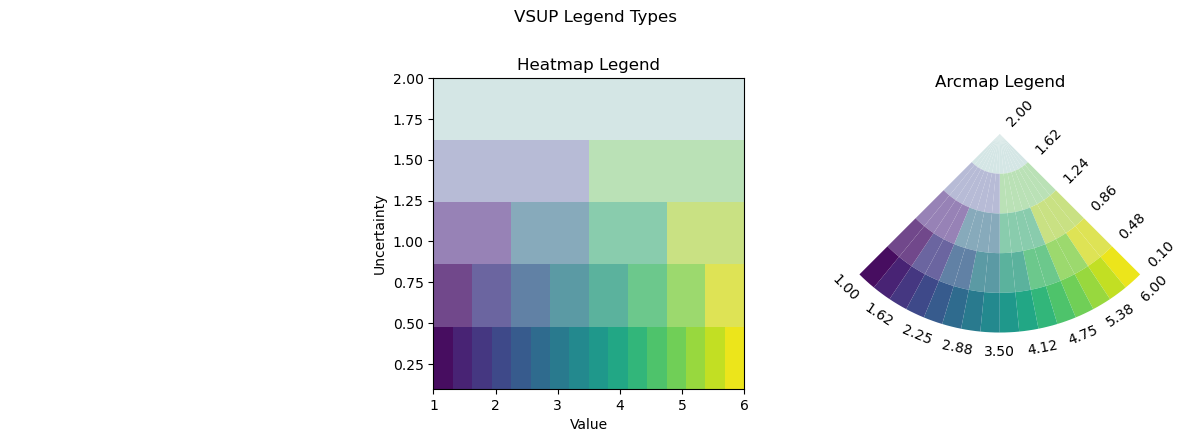

In [5]:
# Create legends using USL mode (Uncertainty mapped to Saturation and Lightness)
vsup = VSUP(palette="viridis", mode="usl", quantization="tree")
vsup(values, uncertainties)

ax1, ax2, ax3 = plt.subplots(1, 3, figsize=(12, 4))[1]

# Create each legend type
# vsup.create_simple_legend(ax1, n_samples=5, title="Simple Legend")
ax1.axis("off")
ax2 = vsup.create_heatmap_legend(ax2)
ax2.set_box_aspect(1)
ax2.set_title("Heatmap Legend")
ax3 = vsup.create_arcmap_legend(ax3)
ax3.set_title("Arcmap Legend")

plt.suptitle("VSUP Legend Types", y=1.05)
plt.tight_layout()